In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ESN import ESN
from learn_esn import train_esn
import gc

In [78]:
df = pd.read_csv('../datasets/processed/processed.csv')
data = df['usage'][:2000].copy()
del df
gc.collect()
data = np.array(data)
data.shape

(2000,)

In [79]:
input_length = 1000

In [80]:
esn = ESN(1, 1000, 1)
train_esn(esn, data, input_length, alpha=2)

(999, 1000)


In [81]:
esn.reservoir = [0.0 for i in range(esn.reservoir_size)]
output = [0] * (len(data)+1)
for i in range (len(data)):
    if i < input_length:
        esn.give_signal(data[i])
    else:
        output[i+1] = esn.get_output(0)


([<matplotlib.lines.Line2D at 0x1639e3c04c0>],
 [<matplotlib.lines.Line2D at 0x1639e3c0820>])

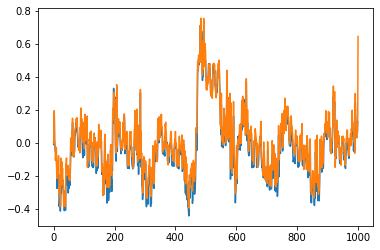

In [82]:
plt.plot(data[input_length:]), plt.plot(output[input_length:])

In [83]:
print("hi")

hi


In [84]:
df = pd.read_csv('../datasets/processed/processed.csv')
data_2 = df['usage'][4000:].copy()
del df
gc.collect()
data_2 = np.array(data_2)
data_2.shape

(1200,)

In [85]:
esn.reservoir = [0.0 for i in range(esn.reservoir_size)]
output = [0] * (len(data_2)+1)
for i in range (len(data_2)):
    if i < input_length:
        esn.give_signal(data_2[i])
    else:
        output[i+1] = esn.get_output(0)

([<matplotlib.lines.Line2D at 0x1639e3f49d0>],
 [<matplotlib.lines.Line2D at 0x1639e3f4c10>])

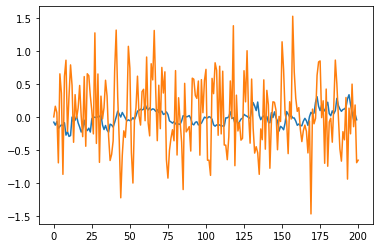

In [86]:
plt.plot(data_2[input_length:]), plt.plot(output[input_length:])